In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Importing the dataset
dt = pd.read_excel('LUAD_Genes.xlsx',index_col=0)


In [3]:
dt.shape

(517, 14807)

In [4]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03


In [5]:
X = dt.iloc[:,0:14805]
y = dt.iloc[:, -1].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [8]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [9]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

In [10]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('UBE2Q2P2', 1.3659906174559655e-06)
('SSX9', 0.0)
('CXORF67', 7.522226446717365e-07)
('EFCAB8', 0.0008503971197582058)
('SDR16C6P', 8.053796004036667e-06)
('EFCAB12', 4.270676477951619e-08)
('A1BG', 3.2271340845587746e-05)
('A1CF', 2.6984927420236176e-06)
('RBFOX1', 1.0982623148421641e-07)
('GGACT', 1.8455881002692095e-06)
('A2ML1', 2.3397919568987867e-05)
('A2M', 1.9386926201470446e-08)
('A4GALT', 9.201566652965157e-08)
('A4GNT', 9.121768980206358e-05)
('AAAS', 9.143806855254579e-08)
('AACSP1', 0.0)
('AACS', 0.00028649172323920083)
('AADACL2', 0.0)
('AADACL3', 0.0)
('AADACL4', 0.0)
('AADAC', 6.39633490208635e-10)
('AAGAB', 3.152869739717104e-10)
('AAK1', 3.3662276798431775e-06)
('AAMP', 3.29828803998448e-06)
('AANAT', 7.030642398493589e-05)
('AARS2', 9.577512088560263e-08)
('AARSD1', 0.0)
('AARS', 1.8632657263394515e-05)
('AASDHPPT', 0.0)
('AASDH', 8.281435777131326e-09)
('AASS', 0.0)
('AATF', 0.0)
('AATK', 0.0)
('ABAT', 0.0017515999956516605)
('ABCA10', 0.00028707052611465645)
('ABC

('CASC4', 0.0)
('CASC5', 1.4487081628007962e-07)
('CASD1', 5.860125728381946e-07)
('CASKIN1', 4.971986241375762e-07)
('CASKIN2', 0.00025633041565157266)
('CASK', 0.0)
('CASP10', 2.834695661521307e-06)
('CASP1', 1.592093108127277e-05)
('CASP2', 5.210417125891569e-07)
('CASP3', 0.0)
('CASP4', 6.796833988871392e-06)
('CASP5', 5.8965408670664755e-06)
('CASP6', 0.00010326681145442749)
('CASP7', 5.268780287502647e-06)
('CASP8AP2', 0.0)
('CASP8', 9.538141798255288e-05)
('CASP9', 0.0)
('CASQ1', 7.21372277210177e-08)
('CASQ2', 1.2062853691741747e-06)
('CASR', 2.5293901696249076e-07)
('CASS4', 1.4096466888050772e-07)
('CAST', 0.0)
('CASZ1', 7.236082439546913e-07)
('CATSPER1', 1.3384251099665961e-08)
('CATSPER2', 6.628053992855851e-05)
('CATSPER3', 3.34886120490617e-08)
('CATSPER4', 5.337156509484443e-06)
('CATSPERB', 0.00025587315620235253)
('CATSPERG', 3.0365560995165766e-05)
('CAT', 1.1018389387636559e-06)
('CAV1', 2.0977896270093215e-08)
('CAV2', 1.0157335103038858e-09)
('CAV3', 0.0)
('MICU1'

('CNOT1', 9.745206111428386e-06)
('CNOT2', 1.7099801799045618e-05)
('CNOT3', 1.3581983311914245e-07)
('CNOT4', 2.388735267797634e-05)
('CNOT6L', 1.1254693373530479e-08)
('CNOT7', 0.0)
('CNOT8', 1.1476615820612911e-06)
('BLOC1S4', 7.433674826849347e-08)
('CNPY1', 1.6735432528605187e-06)
('CNPY2', 3.0427281564946467e-06)
('CNPY3', 0.00021517820750369923)
('CNPY4', 0.0)
('CNP', 4.926118948646654e-05)
('CNR1', 1.1303922481712231e-08)
('CNR2', 0.0)
('CNRIP1', 8.330749277906541e-07)
('CNST', 0.0)
('CNTD1', 1.0588976157265045e-05)
('CNTD2', 0.0013576628100713667)
('CNTFR', 1.5285611917508683e-07)
('CNTF', 6.736960915547552e-09)
('CNTLN', 2.643416123495639e-06)
('CNTN1', 6.255396787710805e-05)
('CNTN2', 2.63871811387074e-07)
('CNTN3', 2.1449051154438038e-06)
('CNTN4', 6.912157431922781e-05)
('CNTN5', 2.096994450592611e-06)
('CNTN6', 1.6799610372495452e-05)
('CNTNAP1', 0.0)
('CNTNAP2', 1.4466563859244178e-07)
('CNTNAP3', 6.361833507827881e-09)
('CNTNAP4', 8.480252130117621e-07)
('CNTNAP5', 1.69

('GLIPR2', 1.6357440928338973e-06)
('GLIS1', 6.366802275750137e-05)
('GLIS2', 5.460708087758689e-05)
('GLIS3', 1.982217837779126e-07)
('GLMN', 2.7720477213447832e-08)
('GLO1', 1.2464328643399296e-09)
('GLOD4', 8.31149033463138e-06)
('GLOD5', 0.0)
('GLP1R', 4.342846006862596e-05)
('GLP2R', 3.2862639150210634e-08)
('GLRA1', 1.0613594390094532e-05)
('GLRA2', 0.0)
('GLRA3', 0.0)
('GLRA4', 0.0)
('GLRB', 0.0006677996493938783)
('GLRX2', 0.0)
('GLRX3', 9.587764225292632e-08)
('GLRX5', 0.0007236304107699647)
('GLRX', 4.1942230514993246e-09)
('GLS2', 9.344413441048497e-08)
('GLS', 2.0418733141933297e-10)
('GLT1D1', 1.6754852381182665e-05)
('COLGALT1', 0.0)
('COLGALT2', 1.131705522590498e-07)
('GLT6D1', 0.0)
('GLT8D1', 5.790458689299294e-07)
('GLT8D2', 5.83761168623717e-08)
('CPTP', 7.029203832350821e-07)
('GLTPD2', 6.60100386470635e-10)
('GLTP', 3.44689897096679e-05)
('GLTSCR1', 0.0)
('GLTSCR2', 4.854756518575438e-08)
('GLUD1', 4.985279971544521e-06)
('GLUL', 4.940342911320251e-09)
('GLYATL1', 

('MEI1', 4.268796070301045e-08)
('MEIG1', 1.9394902210020586e-08)
('MEIS1', 0.0)
('MEIS3', 0.0)
('MELK', 0.0)
('MEMO1', 0.00024294827678642846)
('MEN1', 1.5754149264880464e-07)
('MEOX1', 4.4759451160502454e-05)
('MEOX2', 0.0)
('MEP1A', 9.012197568582079e-07)
('MEP1B', 0.0)
('MEPCE', 2.1484866794762672e-07)
('MEPE', 0.0)
('MERTK', 9.477776863634653e-06)
('MESDC1', 0.0010087780546338596)
('MESDC2', 2.952787007722796e-07)
('MESP1', 8.773746572409802e-08)
('MESP2', 0.00043945280755348205)
('MEST', 6.220542803556379e-06)
('METAP1', 0.0)
('METAP2', 1.2059143527177106e-06)
('METRNL', 0.0)
('METRN', 2.337896701648989e-05)
('METTL16', 0.00011414749319099866)
('METTL17', 1.776827762085906e-05)
('METTL15', 3.8851567358003404e-05)
('METTL10', 2.121271568351136e-06)
('NTMT1', 2.5201049072753076e-07)
('METTL11B', 0.0)
('METTL12', 2.921338731915159e-05)
('METTL13', 9.266556450711487e-07)
('METTL14', 1.9659582954888317e-05)
('METTL1', 0.0)
('METTL2A', 0.00015289287892225668)
('METTL2B', 0.0)
('METTL3'

('PRKCB', 0.0)
('PRKCDBP', 6.070265033687584e-05)
('PRKCD', 0.00014194959562027063)
('PRKCE', 2.916667936170034e-06)
('PRKCG', 4.131342138991046e-08)
('PRKCH', 0.0)
('PRKCI', 4.0531069237734106e-06)
('PRKCQ', 1.2692109225894985e-07)
('PRKCSH', 5.175589730858687e-09)
('PRKCZ', 1.6753313169539414e-05)
('PRKD1', 1.714675660349221e-06)
('PRKD2', 9.211459697236242e-07)
('PRKD3', 0.0)
('PRKDC', 0.0)
('PRKG1', 5.394674741319908e-06)
('PRKG2', 1.2155559958192854e-05)
('PRKRA', 1.7958578700426375e-05)
('PRKRIP1', 4.896523675042691e-08)
('PRKRIR', 0.0)
('PRKX', 2.508961416780307e-05)
('PRLHR', 5.2426585327107356e-08)
('PRLH', 0.0)
('PRLR', 4.0304932699631805e-06)
('PRL', 0.0)
('PRM1', 0.0)
('PRM2', 0.0)
('PRM3', 0.0)
('PRMT9', 0.0009505038762475268)
('PRMT1', 1.876780557305551e-06)
('PRMT2', 1.5430119986112411e-07)
('PRMT3', 4.228336033160322e-06)
('PRMT5', 1.9238629397303354e-07)
('PRMT6', 0.00020281284974171855)
('PRMT7', 3.0661638222003135e-07)
('PRMT8', 1.3289650442471027e-06)
('PRND', 0.0)


In [12]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [13]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [14]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

EFCAB8
A4GNT
AACS
AANAT
ABAT
ABCA10
ABCB6
ABCC11
ABCC9
ABCD4
ABCF2
ABCG8
ABO
ABRA
ACAN
ACBD7
ACCSL
ACMSD
ACOT1
ACOX3
ACP1
ACRBP
ACSBG2
ACSM1
ACSM4
ACSM5
ACSS2
ACTA1
ACTC1
ACVR1C
ACVR2B
ACYP1
ADAL
ADAM23
ADAM6
ADAMTS18
ADAMTS20
ADAMTS6
ADAMTSL1
ADAP1
ADCK5
ADCY3
ADCYAP1R1
ADH1C
ADORA3
ADPRHL2
AFF1
AGBL3
AGR3
AGTR2
ETNPPL
AHCTF1
AHSA1
AHSA2
AIF1L
AIFM3
AIM2
AIP
AKAP5
AKAP6
AKR1B1
AKR7A2
AKT1S1
AKTIP
ALDOA
ALG8
ALKBH8
ALOX12B
SLC35G6
AMFR
AMPD1
ANK3
ANKFY1
ANKRD10
ANKRD13A
ANKRD22
ANKRD26P1
ANKRD28
ANKRD35
ANKRD36B
ANKRD39
ANKRD49
ANO10
AP3D1
AP3M2
APC2
APCDD1L
APCDD1
APLN
APOBEC2
APOBEC3A
APPBP2
AQP9
ARAF
ARCN1
ARFIP2
ARG2
ARHGAP11B
ARHGAP8
ARHGEF10
ARHGEF18
ARHGEF19
ARHGEF35
ARID2
ARL13B
ARPC1A
ACTRT3
ARRB1
ARRDC3
ART3
ARV1
AS3MT
ASAH1
ASCL4
ASPSCR1
ASTE1
ATAD3C
ATIC
ATL2
ATOH7
ATP12A
ATP4A
ATP5B
ATP5J
ATP5O
ATP6AP2
ATP6V0A1
ATP6V0E1
ATP6V1E2
AVEN
AVIL
B2M
B3GALT4
B3GNT6
B4GALNT1
B4GALT1
B4GALT3
BAG1
BAGE2
BAP1
BCAM
BCAR1
BCCIP
BCL2L10
BCL7C
NBEAP1
BCR
BDH1
BEND5
BEST3
BHLHA15
BHMT2
BIC

In [15]:
sfm.get_support().sum()

1654

In [16]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [17]:
rgr_important = GradientBoostingRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:

y_predval = rgr_important.predict(X_important_val)

In [19]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6298378961742065
0.7305442615376078
0.8547188201611146
R2 Score
-0.04863150151183815


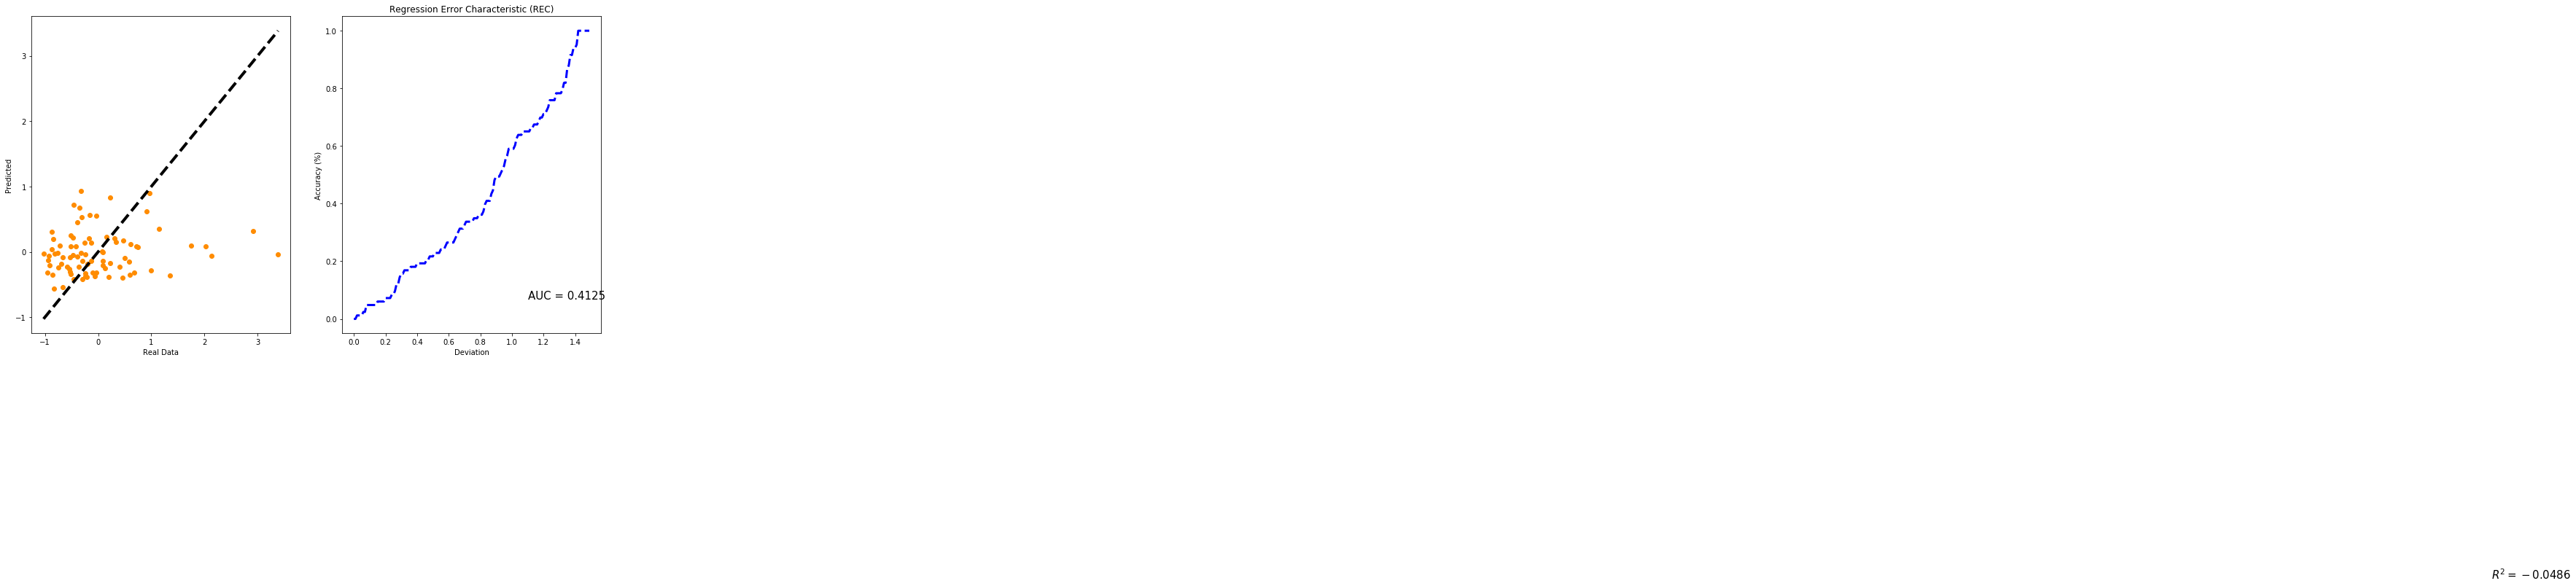

In [21]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [22]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {  'learning_rate':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
                 'n_estimators': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70] ,
              'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,95,100],
              'min_samples_split':[0.005,0.001,0.01,0.05,0.1,0.5,0.9,1.0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'min_samples_leaf':[0.1,0.20,0.3,0.4,0.5],
              'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
              'max_features': [1,2,3,4,5,6,7,8,9,10]
                 }  
regressor = GradientBoostingRegressor()
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,cv=3,n_jobs=-1)
random_result=random.fit(X_important_train,y_train)
print("Best: %f using %s" % (random_result.best_score_,random_result.best_params_))

Best: -0.030519 using {'n_estimators': 8, 'min_weight_fraction_leaf': 0.3, 'min_samples_split': 85, 'min_samples_leaf': 0.3, 'max_features': 9, 'max_depth': 4, 'learning_rate': 0.005}


In [23]:
regressor = GradientBoostingRegressor(learning_rate=0.005,n_estimators=8,max_depth=4,min_samples_split = 85,min_samples_leaf=0.3,min_weight_fraction_leaf=0.3,max_features=9)

regressor.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=4, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=0.3,
             min_samples_split=85, min_weight_fraction_leaf=0.3,
             n_estimators=8, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
y_predval = regressor.predict(X_important_val)

In [25]:

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6103433643029418
0.6968658332842607
0.8347849024055602
R2 Score
-0.00028910441527552067


R^2 = -0.0003


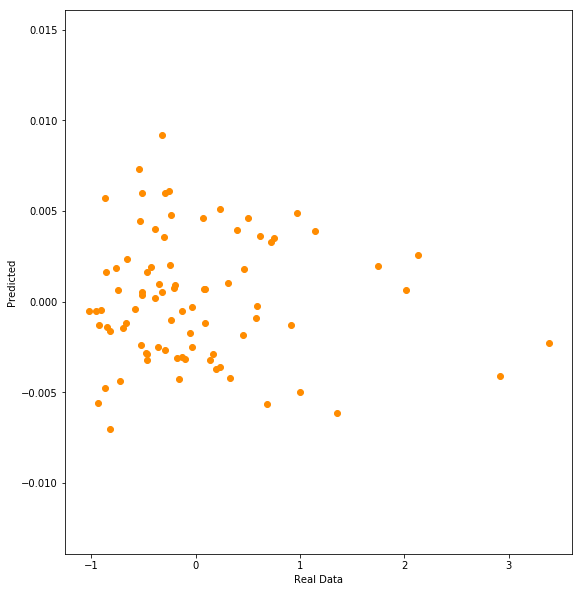

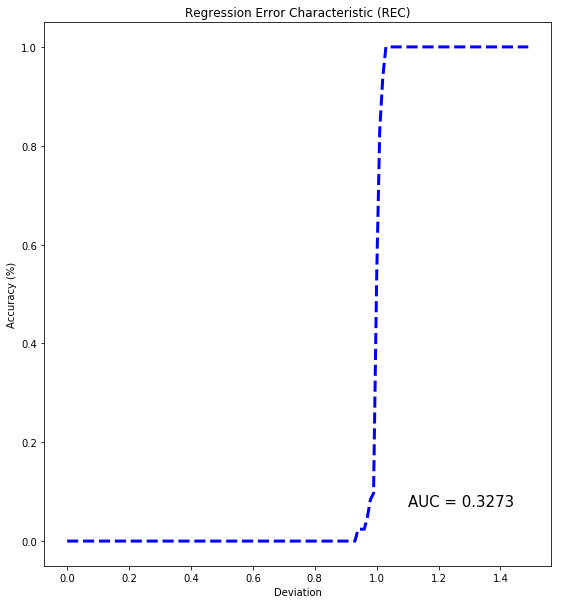

In [26]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()